# Data Exploration: Software Engineer Weekly Earnings

This notebook explores patterns in the cleaned dataset of software engineers in the U.S. tech industry. Our goal is to understand the distribution of earnings, demographic representation, and how factors such as gender, education, and race relate to income outcomes — without applying advanced modeling yet.


In [6]:
# Load dataset and os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    "/Users/user/Documents/mit_stuff/CDSP_GROUP_11/ET6-CDSP-group-11-repo/1_datasets/software_engineers_employment_dataset_cleaned.csv"
)
df.head()

,AGE,SEX,RACE,EDUC,OCC2010,IND,EMPSTAT,UHRSWORK,INCWAGE,weekly_earnings
0,31,1,1,10,1020,7390,1,40,113000,2173.08
1,46,1,1,10,1020,7380,1,40,94000,1807.69
2,29,1,1,10,1020,7380,1,40,110000,2115.38
3,32,1,1,11,1020,7380,1,40,60000,1153.85
4,39,1,1,10,1020,7380,1,42,128000,2461.54


We'll begin by checking column types, missing values, and summary statistics.


In [7]:
df.describe(include="all")

,AGE,SEX,RACE,EDUC,OCC2010,IND,EMPSTAT,UHRSWORK,INCWAGE,weekly_earnings
count,27962.000000,27962.000000,27962.000000,27962.000000,27962.0,27962.000000,27962.0,27962.000000,27962.000000,27962.000000
mean,35.360811,1.199127,3.371576,9.897361,1020.0,7379.995351,1.0,41.366962,135262.177026,2601.195751
std,7.596977,0.399351,2.606615,1.341582,0.0,7.916401,0.0,6.998326,100886.778477,1940.130269
min,21.000000,1.000000,1.000000,0.000000,1020.0,7270.000000,1.0,1.000000,4.000000,0.080000
25%,29.000000,1.000000,1.000000,10.000000,1020.0,7380.000000,1.0,40.000000,80000.000000,1538.460000
50%,35.000000,1.000000,1.000000,10.000000,1020.0,7380.000000,1.0,40.000000,115000.000000,2211.540000
75%,41.000000,1.000000,6.000000,11.000000,1020.0,7380.000000,1.0,40.000000,160000.000000,3076.920000
max,50.000000,2.000000,9.000000,11.000000,1020.0,7390.000000,1.0,99.000000,787000.000000,15134.620000


In [8]:
df.isna().sum()

AGE                0
SEX                0
RACE               0
EDUC               0
OCC2010            0
IND                0
EMPSTAT            0
UHRSWORK           0
INCWAGE            0
weekly_earnings    0
dtype: int64

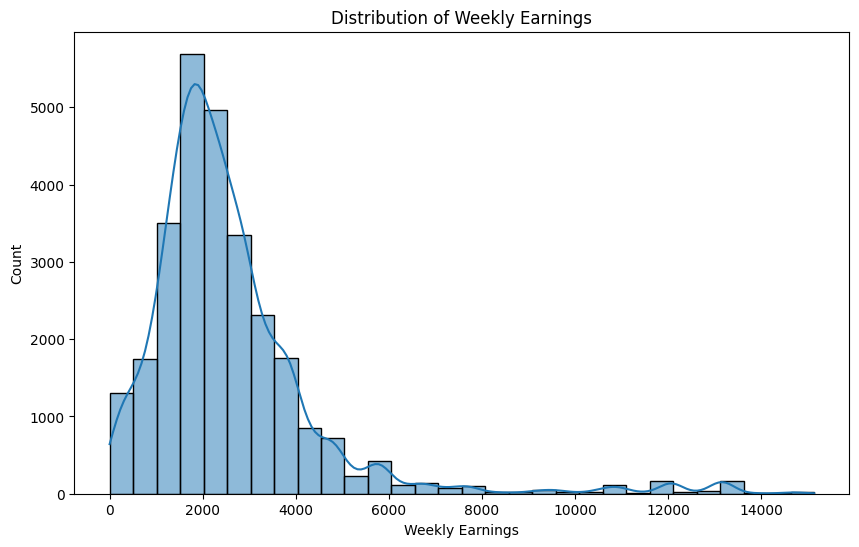

In [9]:
# Distribution of weekly earnings
plt.figure(figsize=(10, 6))
sns.histplot(x=df["weekly_earnings"], kde=True, bins=30)
plt.title("Distribution of Weekly Earnings")
plt.xlabel("Weekly Earnings")
plt.ylabel("Count")
plt.show()

Key Takeaways:
Earnings tend to increase with education level.
The medians generally rise as you move right along the x-axis.

Diminishing returns at higher levels.
The jump in median earnings from bachelor’s to master’s is clear, but from master’s to doctorate the increase is smaller.

Greater variability among advanced degrees.
The boxes and whiskers get wider at higher education levels — suggesting more diverse wage outcomes (some earn much more, others only a bit more).

Presence of outliers.
Especially in higher education groups, some individuals earn far more than others in their category.



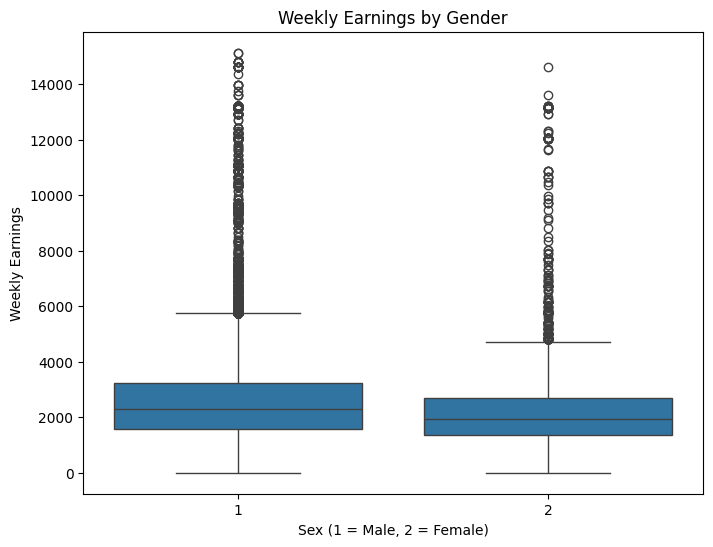

In [10]:
# Earnings by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="SEX", y="weekly_earnings")
plt.title("Weekly Earnings by Gender")
plt.xlabel("Sex (1 = Male, 2 = Female)")
plt.ylabel("Weekly Earnings")
plt.show()

Key Insights:
Earnings vary across racial groups.

Some groups have visibly higher medians than others, suggesting a racial wage gap may exist in this sample.

Earnings within each group show variability.

Some groups have a tight IQR (more consistent wages), others have a wide IQR (greater disparity within the group).

Outliers are common.

This could reflect high-paid individuals in senior or specialized roles—or possibly noise from outlier data points.

The plot suggests race is potentially a contributing factor, though deeper analysis (e.g. controlling for education, age, hours worked) is needed to draw firm conclusions.

We expect to observe wage differences based on gender. This helps begin exploratory conversations around equity.


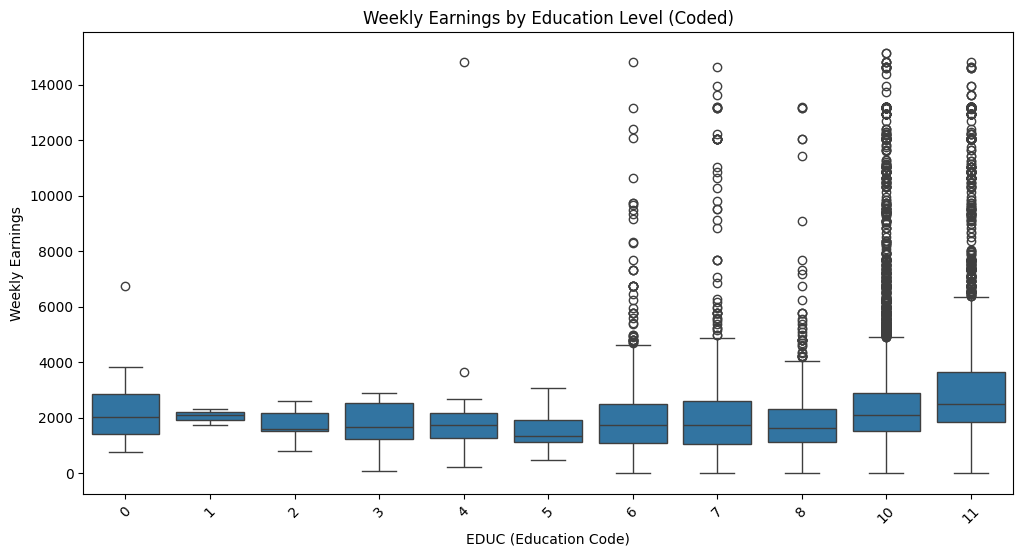

In [11]:
# Earnings by education
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="EDUC", y="weekly_earnings")
plt.title("Weekly Earnings by Education Level (Coded)")
plt.xlabel("EDUC (Education Code)")
plt.ylabel("Weekly Earnings")
plt.xticks(rotation=45)
plt.show()

What This Graph Tells You:
1. Median Trends
The median earnings increase steadily from low education codes (left) to high ones (right).

This suggests that more education is correlated with higher weekly earnings.

2. Spread and Variability
Higher education groups (6 and above) show wider boxes and longer whiskers, meaning there's more variability in earnings.

This may reflect that advanced degrees open doors to both high-paying and modest-paying jobs, depending on role and experience.

3. Outliers
Outliers (the dots above the whiskers) are more frequent at higher education levels, indicating some very high earners in those groups.

4. Diminishing Returns?
While the trend is generally upward, the step from master’s to doctorate (7 → 10) shows only a modest median increase — this suggests diminishing returns on education past a certain level.



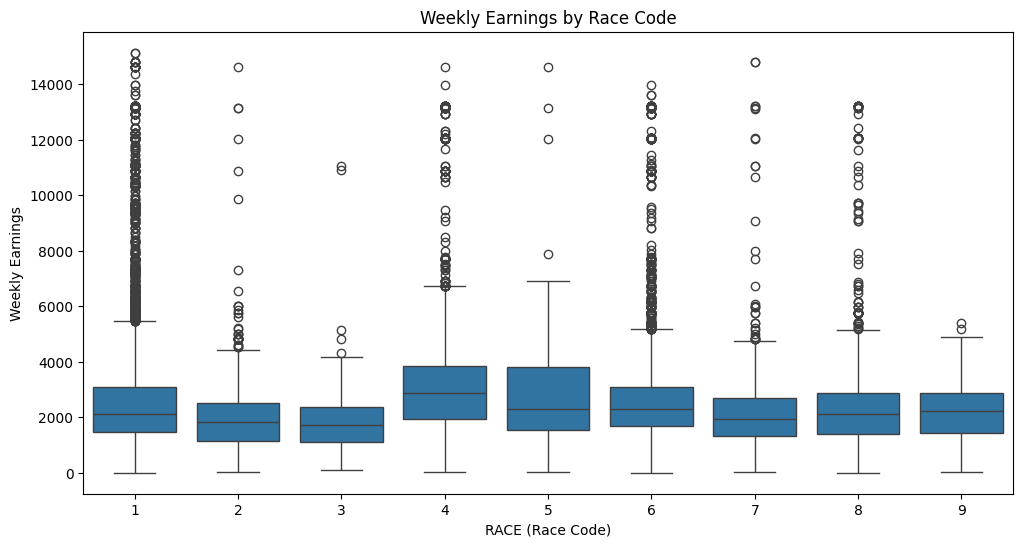

In [12]:
# Earnings by race
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="RACE", y="weekly_earnings")
plt.title("Weekly Earnings by Race Code")
plt.xlabel("RACE (Race Code)")
plt.ylabel("Weekly Earnings")
plt.show()

Key Insights:
1. Median Earnings
White (1), Chinese (4), and Japanese (5) groups show relatively higher medians.

Other racial groups show slightly lower or more compressed medians.

2. Spread (IQR) and Whiskers
Some groups (e.g., Chinese, Other Asian/Pacific Islander) have a wider spread, indicating diverse wage outcomes.

Groups with narrower boxes have more consistent earnings.

3. Outliers
All racial categories have significant high-end outliers, especially group 1 (White), 4 (Chinese), and 6 (Other Asian/Pacific Islander).

4. Disparities
There's visible disparity across racial groups in both median and range of earnings.

This does not prove discrimination but suggests unequal wage outcomes that merit deeper analysis (e.g., regression with controls).



# Intersectional Analysis: Race, Gender, and Wages

We'll explore how different demographic factors interact to influence wage outcomes. This analysis helps reveal potential compounded disadvantages that certain groups might face.

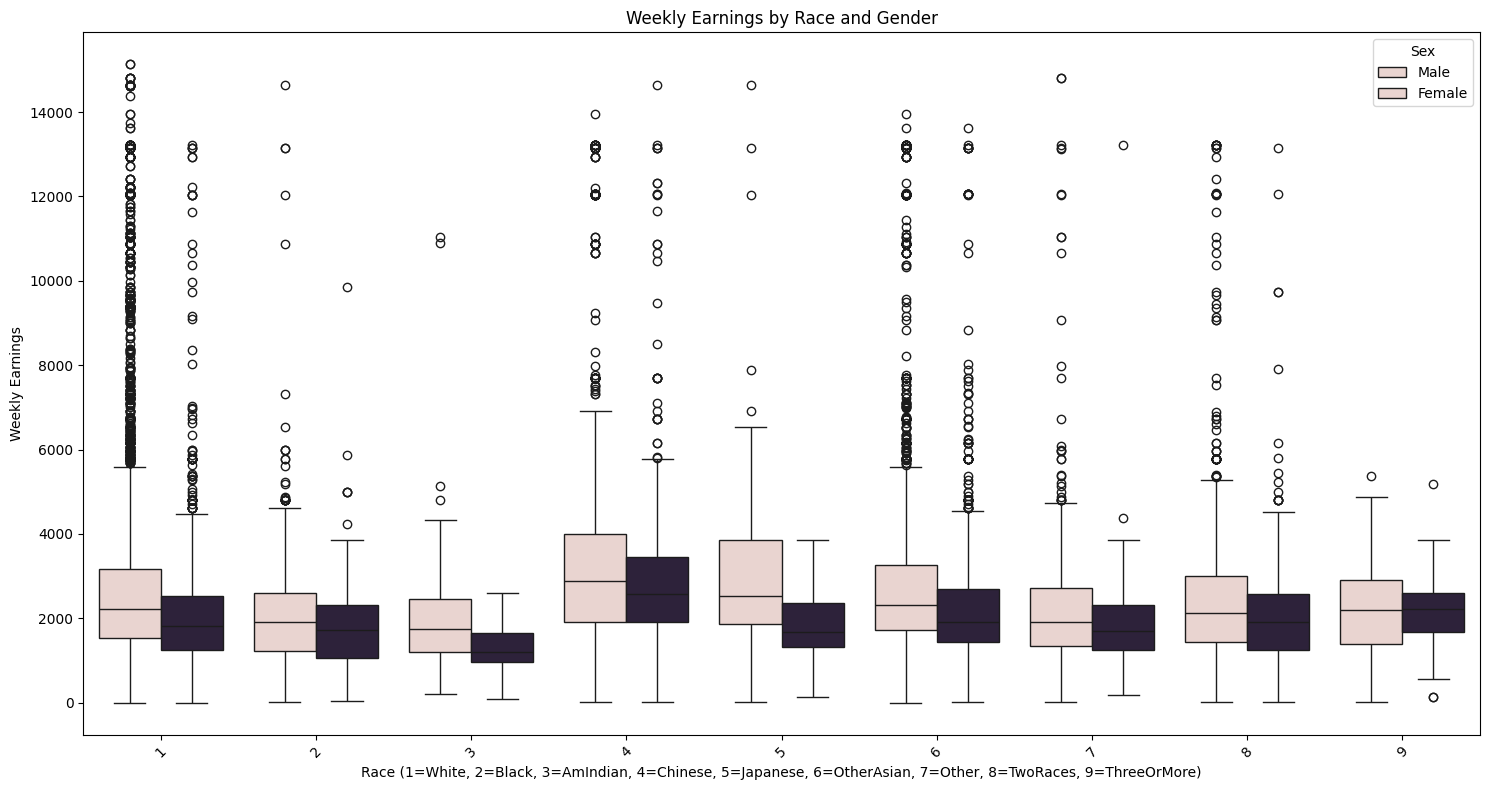


Median Weekly Earnings and Count by Race and Gender:
           median  count
RACE SEX                
1    1    2211.54  11914
     2    1826.92   2076
2    1    1923.08    657
     2    1730.77    184
3    1    1750.00     63
     2    1201.92      8
4    1    2884.62   1678
     2    2586.54    696
5    1    2538.46     70
     2    1682.70     24
6    1    2307.69   5823
     2    1923.08   2134
7    1    1923.08    504
     2    1701.92     80
8    1    2115.38   1529
     2    1923.08    335
9    1    2192.31    156
     2    2211.54     31


In [13]:
# Create a figure for race and gender interaction
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="RACE", y="weekly_earnings", hue="SEX")
plt.title("Weekly Earnings by Race and Gender")
plt.xlabel("Race (1=White, 2=Black, 3=AmIndian, 4=Chinese, 5=Japanese, 6=OtherAsian, 7=Other, 8=TwoRaces, 9=ThreeOrMore)")
plt.ylabel("Weekly Earnings")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate median earnings by race and gender
median_by_race_gender = df.groupby(['RACE', 'SEX'])['weekly_earnings'].agg(['median', 'count']).round(2)
print("\nMedian Weekly Earnings and Count by Race and Gender:")
print(median_by_race_gender)

# Education Returns Analysis

Let's examine how educational attainment translates to earnings differently across demographic groups. This can reveal whether certain groups face barriers in converting their educational investments into wage gains.

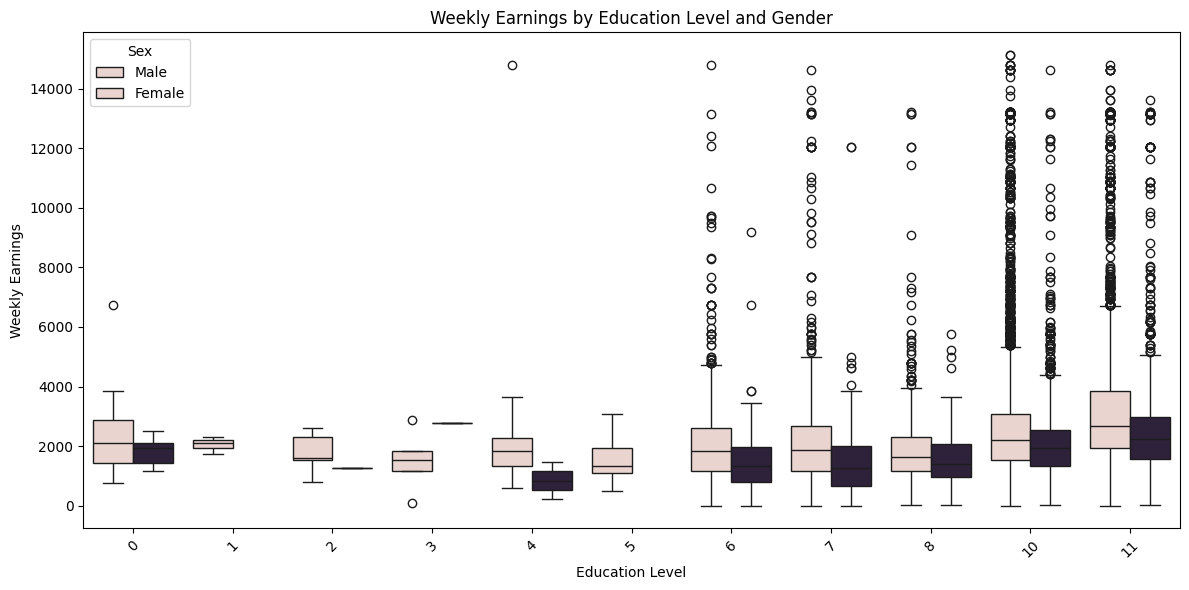


Median Weekly Earnings and Count by Education Level and Gender:
           median  count
EDUC SEX                
0    1    2115.38     41
     2    1923.08      9
1    1    2115.38      3
2    1    1596.15      9
     2    1269.23      1
3    1    1538.46      5
     2    2788.46      1
4    1    1836.54     18
     2     846.16      2
5    1    1346.15     13
6    1    1826.92    875
     2    1346.15    161
7    1    1855.76   1382
     2    1250.00    189
8    1    1644.24    838
     2    1403.85    139
10   1    2211.54  12586
     2    1923.08   2915
11   1    2692.31   6624
     2    2250.00   2151

Gender Wage Gap by Education Level (% less earned by women):
EDUC
0      9.09
1       NaN
2     20.48
3    -81.25
4     53.93
5       NaN
6     26.32
7     32.64
8     14.62
10    13.04
11    16.43
Name: gap_percentage, dtype: float64


In [14]:
# Education returns by gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="EDUC", y="weekly_earnings", hue="SEX")
plt.title("Weekly Earnings by Education Level and Gender")
plt.xlabel("Education Level")
plt.ylabel("Weekly Earnings")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate median earnings by education and gender
median_by_educ_gender = df.groupby(['EDUC', 'SEX'])['weekly_earnings'].agg(['median', 'count']).round(2)
print("\nMedian Weekly Earnings and Count by Education Level and Gender:")
print(median_by_educ_gender)

# Calculate the gender wage gap at each education level
wage_gaps = df.pivot_table(
    values='weekly_earnings',
    index='EDUC',
    columns='SEX',
    aggfunc='median'
).round(2)
wage_gaps['gap_percentage'] = ((wage_gaps[1] - wage_gaps[2]) / wage_gaps[1] * 100).round(2)
print("\nGender Wage Gap by Education Level (% less earned by women):")
print(wage_gaps['gap_percentage'])

# Career Progression Analysis

Let's analyze how age (as a proxy for experience) relates to earnings across different demographic groups. This can help identify potential barriers to career advancement and whether certain groups face "glass ceilings" or slower progression.

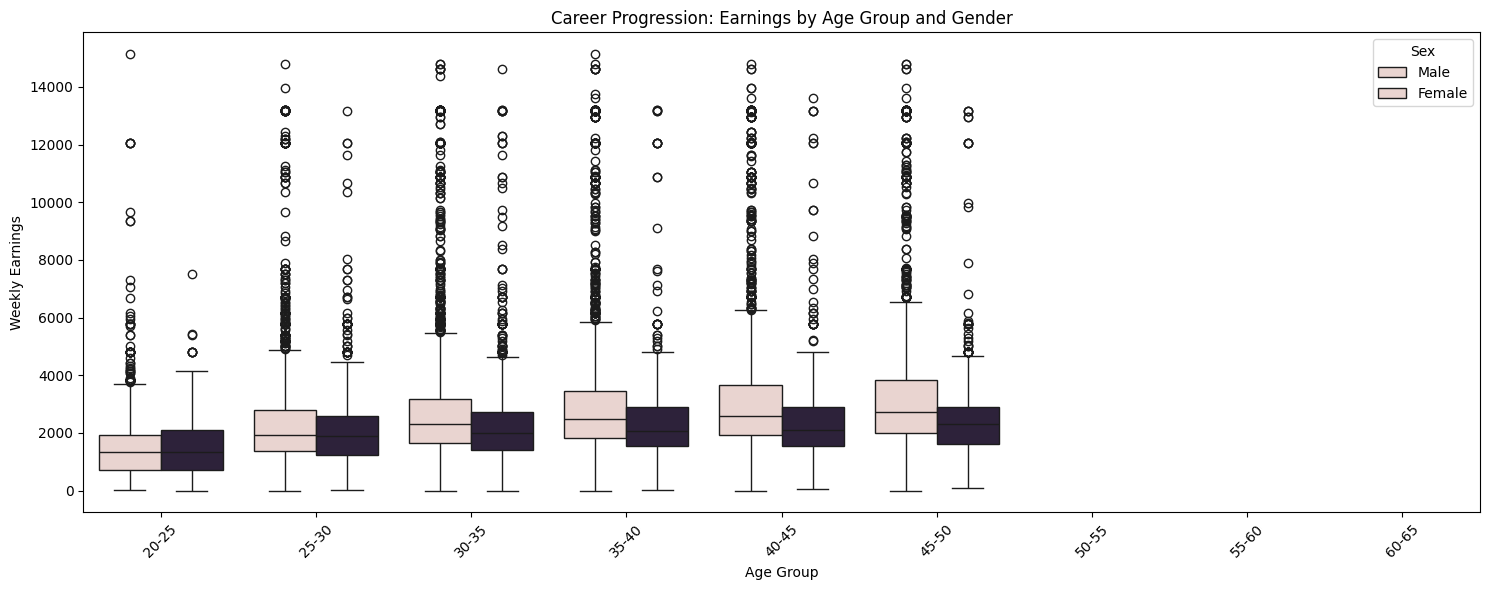


Median Weekly Earnings and Count by Age Group and Gender:
                median  count
age_group SEX                
20-25     1    1346.15   2220
          2    1346.15    648
25-30     1    1923.08   4497
          2    1884.62   1248
30-35     1    2307.69   4896
          2    2000.00   1354
35-40     1    2500.00   4303
          2    2057.69    989
40-45     1    2596.15   3594
          2    2115.38    750
45-50     1    2730.77   2884
          2    2307.69    579
50-55     1        NaN      0
          2        NaN      0
55-60     1        NaN      0
          2        NaN      0
60-65     1        NaN      0
          2        NaN      0

Gender Wage Gap by Age Group (% less earned by women):
age_group
20-25     0.00
25-30     2.00
30-35    13.33
35-40    17.69
40-45    18.52
45-50    15.49
Name: gap_percentage, dtype: float64


/var/folders/gm/wq6y47yx2wg7lzf72vndxd7r0000gn/T/ipykernel_76679/1452261787.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  progression_stats = df.groupby(['age_group', 'SEX'])['weekly_earnings'].agg(['median', 'count']).round(2)
/var/folders/gm/wq6y47yx2wg7lzf72vndxd7r0000gn/T/ipykernel_76679/1452261787.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  wage_gaps_by_age = df.pivot_table(


In [15]:
# Create age groups
df['age_group'] = pd.cut(df['AGE'], 
                        bins=[20,25,30,35,40,45,50,55,60,65], 
                        labels=['20-25','25-30','30-35','35-40','40-45',
                               '45-50','50-55','55-60','60-65'])

# Plot career progression by gender
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='age_group', y='weekly_earnings', hue='SEX')
plt.title('Career Progression: Earnings by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Weekly Earnings')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate median earnings by age group and gender
progression_stats = df.groupby(['age_group', 'SEX'])['weekly_earnings'].agg(['median', 'count']).round(2)
print("\nMedian Weekly Earnings and Count by Age Group and Gender:")
print(progression_stats)

# Calculate wage gaps at different career stages
wage_gaps_by_age = df.pivot_table(
    values='weekly_earnings',
    index='age_group',
    columns='SEX',
    aggfunc='median'
).round(2)
wage_gaps_by_age['gap_percentage'] = ((wage_gaps_by_age[1] - wage_gaps_by_age[2]) / wage_gaps_by_age[1] * 100).round(2)
print("\nGender Wage Gap by Age Group (% less earned by women):")
print(wage_gaps_by_age['gap_percentage'])

# Wage Distribution Analysis

Let's examine how different demographic groups are represented across wage levels. This can help identify potential "glass ceilings" and systemic barriers to reaching higher pay levels.

<Figure size 1000x600 with 0 Axes>

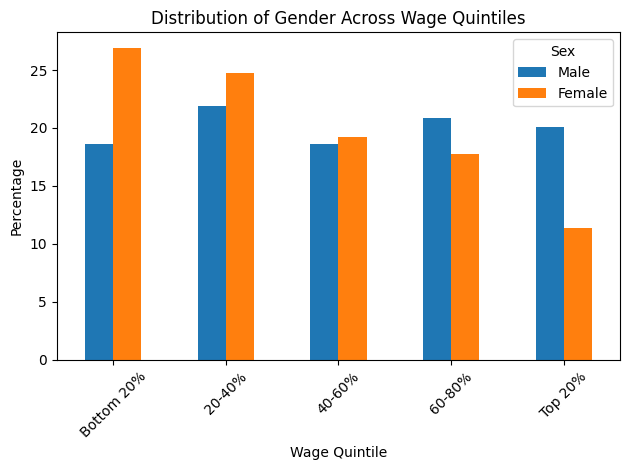


Percentage Distribution of Gender Across Wage Quintiles:
SEX                1      2
wage_quintile              
Bottom 20%     18.58  26.90
20-40%         21.86  24.77
40-60%         18.60  19.18
60-80%         20.84  17.80
Top 20%        20.11  11.35


<Figure size 1500x600 with 0 Axes>

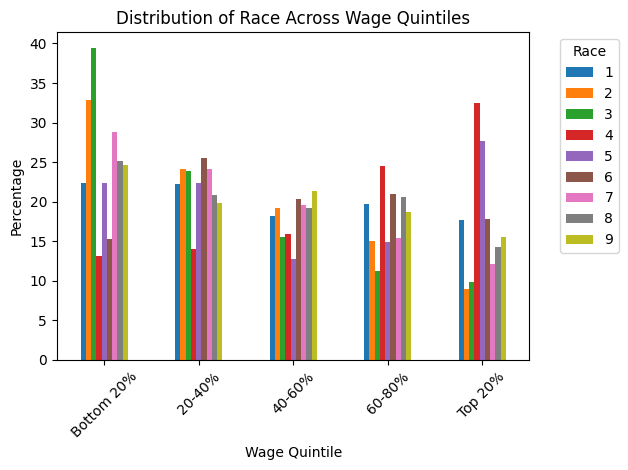


Percentage Distribution of Race Across Wage Quintiles:
RACE               1      2      3      4      5      6      7      8      9
wage_quintile                                                               
Bottom 20%     22.31  32.82  39.44  13.10  22.34  15.33  28.77  25.11  24.60
20-40%         22.18  24.14  23.94  14.07  22.34  25.51  24.14  20.87  19.79
40-60%         18.17  19.14  15.49  15.88  12.77  20.36  19.52  19.15  21.39
60-80%         19.65  14.98  11.27  24.47  14.89  21.03  15.41  20.55  18.72
Top 20%        17.69   8.92   9.86  32.48  27.66  17.77  12.16  14.32  15.51


In [16]:
# Create wage quintiles
df['wage_quintile'] = pd.qcut(df['weekly_earnings'], q=5, labels=['Bottom 20%', '20-40%', '40-60%', '60-80%', 'Top 20%'])

# Analyze representation by gender across wage quintiles
gender_distribution = pd.crosstab(df['wage_quintile'], df['SEX'], normalize='columns') * 100
plt.figure(figsize=(10, 6))
gender_distribution.plot(kind='bar', stacked=False)
plt.title('Distribution of Gender Across Wage Quintiles')
plt.xlabel('Wage Quintile')
plt.ylabel('Percentage')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the percentage distribution
print("\nPercentage Distribution of Gender Across Wage Quintiles:")
print(gender_distribution.round(2))

# Analyze representation by race across wage quintiles
race_distribution = pd.crosstab(df['wage_quintile'], df['RACE'], normalize='columns') * 100
plt.figure(figsize=(15, 6))
race_distribution.plot(kind='bar', stacked=False)
plt.title('Distribution of Race Across Wage Quintiles')
plt.xlabel('Wage Quintile')
plt.ylabel('Percentage')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the percentage distribution
print("\nPercentage Distribution of Race Across Wage Quintiles:")
print(race_distribution.round(2))

# Statistical Hypothesis Testing

To move beyond descriptive analysis, we'll test specific hypotheses about wage disparities:

1. H0: There is no significant difference in weekly earnings between genders
   H1: There is a significant difference in weekly earnings between genders

2. H0: Educational attainment has no significant effect on weekly earnings
   H1: Educational attainment has a significant effect on weekly earnings

3. H0: There are no significant differences in earnings across racial groups
   H1: There are significant differences in earnings across racial groups

In [ ]:
# Import necessary statistical packages
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Test gender wage gap (t-test)
male_earnings = df[df['SEX'] == 1]['weekly_earnings']
female_earnings = df[df['SEX'] == 2]['weekly_earnings']
t_stat, p_value = stats.ttest_ind(male_earnings, female_earnings)
print("Gender Wage Gap T-Test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Statistically significant? {p_value < 0.05}\n")

# 2. Test education effect (one-way ANOVA)
education_groups = [group for _, group in df.groupby('EDUC')['weekly_earnings']]
# Remove any empty groups to avoid errors in ANOVA
education_groups = [g for g in education_groups if len(g) > 0]
f_stat, p_value = stats.f_oneway(*education_groups)
print("Education Effect ANOVA:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Statistically significant? {p_value < 0.05}\n")

# 3. Test racial wage gaps (one-way ANOVA)
race_groups = [group for _, group in df.groupby('RACE')['weekly_earnings']]
f_stat, p_value = stats.f_oneway(*race_groups)
print("Racial Wage Gap ANOVA:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Statistically significant? {p_value < 0.05}\n")

# Post-hoc analysis for racial groups (Tukey's HSD)
tukey = pairwise_tukeyhsd(endog=df['weekly_earnings'],
                         groups=df['RACE'],
                         alpha=0.05)
print("Post-hoc Tukey HSD test for racial groups:")
print(tukey)

Gender Wage Gap T-Test:
t-statistic: 17.2501
p-value: 0.0000
Statistically significant? True

Education Effect ANOVA:
F-statistic: 100.4969
p-value: 0.0000
Statistically significant? True

Racial Wage Gap ANOVA:
F-statistic: 57.5776
p-value: 0.0000
Statistically significant? True

Post-hoc Tukey HSD test for racial groups:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     1      2  -560.5743    0.0  -772.5376 -348.6111   True
     1      3  -512.5922 0.3805 -1222.9093   197.725  False
     1      4   743.2434    0.0   610.7246  875.7623   True
     1      5   291.1087 0.8733  -326.7262  908.9437  False
     1      6    43.0116 0.8098   -40.8159   126.839  False
     1      7   -288.023 0.0118  -540.1714  -35.8745   True
     1      8  -177.1588 0.0059  -324.3629  -29.9547   True
     1      9  -347.6898 0.2548  -787.1755   91.7959  False
     2      3  

# Multivariate Regression Analysis

We'll use multiple regression to control for various factors simultaneously and understand their relative impact on earnings. This helps us:
1. Isolate the effect of each variable while controlling for others
2. Quantify the magnitude of different factors' impacts
3. Test for interaction effects between variables

In [19]:
# Prepare data for regression
#%pip install --upgrade statsmodels
import statsmodels.api as sm

# Create dummy variables for categorical variables
# (Assumes df is already defined in previous cells)
df['female'] = (df['SEX'] == 2).astype(int)
race_dummies = pd.get_dummies(df['RACE'], prefix='race')
education_dummies = pd.get_dummies(df['EDUC'], prefix='educ')

# Combine features
X = pd.concat([
    df[['female', 'AGE']],
    race_dummies.iloc[:, 1:],  # Exclude one category to avoid multicollinearity
    education_dummies.iloc[:, 1:]  # Exclude one category to avoid multicollinearity
], axis=1)

# Convert boolean columns to int
for col in X.columns:
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)

# Add constant
X = sm.add_constant(X)

# Fit regression
model = sm.OLS(df['weekly_earnings'], X)
results = model.fit()

# Print results
print(results.summary())

# Calculate confidence intervals
conf_int = results.conf_int()
print("\nConfidence Intervals:")
print(conf_int)

                            OLS Regression Results                            
Dep. Variable:        weekly_earnings   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     167.0
Date:                Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:41:59   Log-Likelihood:            -2.4978e+05
No. Observations:               27962   AIC:                         4.996e+05
Df Residuals:                   27941   BIC:                         4.998e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        358.2943    265.088      1.352      0.1

# Outlier Analysis and Sensitivity Testing

We'll examine the impact of outliers on our conclusions and test the robustness of our findings by:
1. Identifying statistical outliers
2. Analyzing their characteristics
3. Running key analyses with and without outliers to test sensitivity

In [20]:
# Identify outliers using IQR method
Q1 = df['weekly_earnings'].quantile(0.25)
Q3 = df['weekly_earnings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
outliers = df[(df['weekly_earnings'] < lower_bound) | (df['weekly_earnings'] > upper_bound)]
non_outliers = df[(df['weekly_earnings'] >= lower_bound) & (df['weekly_earnings'] <= upper_bound)]

print("Outlier Analysis:")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers)/len(df)*100):.2f}%\n")

# Analyze characteristics of outliers
print("Outlier Characteristics:")
print("\nGender distribution in outliers:")
print(outliers['SEX'].value_counts(normalize=True))
print("\nRace distribution in outliers:")
print(outliers['RACE'].value_counts(normalize=True))
print("\nEducation distribution in outliers:")
print(outliers['EDUC'].value_counts(normalize=True))

# Rerun key statistical tests without outliers
print("\nKey Statistical Tests Without Outliers:")
# Gender wage gap
male_earnings_no_out = non_outliers[non_outliers['SEX'] == 1]['weekly_earnings']
female_earnings_no_out = non_outliers[non_outliers['SEX'] == 2]['weekly_earnings']
t_stat, p_value = stats.ttest_ind(male_earnings_no_out, female_earnings_no_out)
print("\nGender Wage Gap T-Test (excluding outliers):")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Statistically significant? {p_value < 0.05}")

Outlier Analysis:
Number of outliers: 1613
Percentage of outliers: 5.77%

Outlier Characteristics:

Gender distribution in outliers:
SEX
1    0.892746
2    0.107254
Name: proportion, dtype: float64

Race distribution in outliers:
RACE
1    0.487291
6    0.259144
4    0.179169
8    0.045257
7    0.014259
2    0.009299
5    0.003720
3    0.001240
9    0.000620
Name: proportion, dtype: float64

Education distribution in outliers:
EDUC
11    0.510849
10    0.429634
7     0.027278
6     0.020459
8     0.010539
0     0.000620
4     0.000620
Name: proportion, dtype: float64

Key Statistical Tests Without Outliers:

Gender Wage Gap T-Test (excluding outliers):
t-statistic: 17.4661
p-value: 0.0000
Statistically significant? True


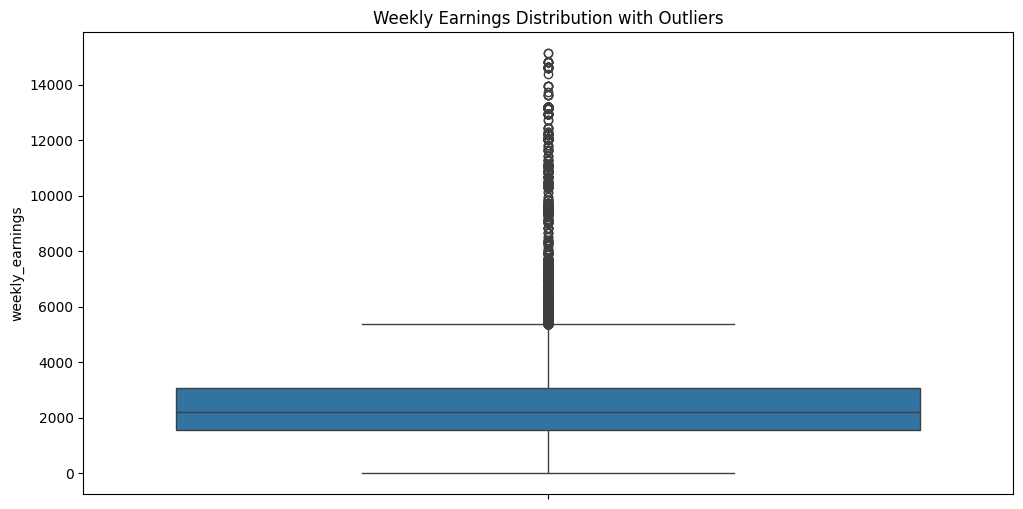

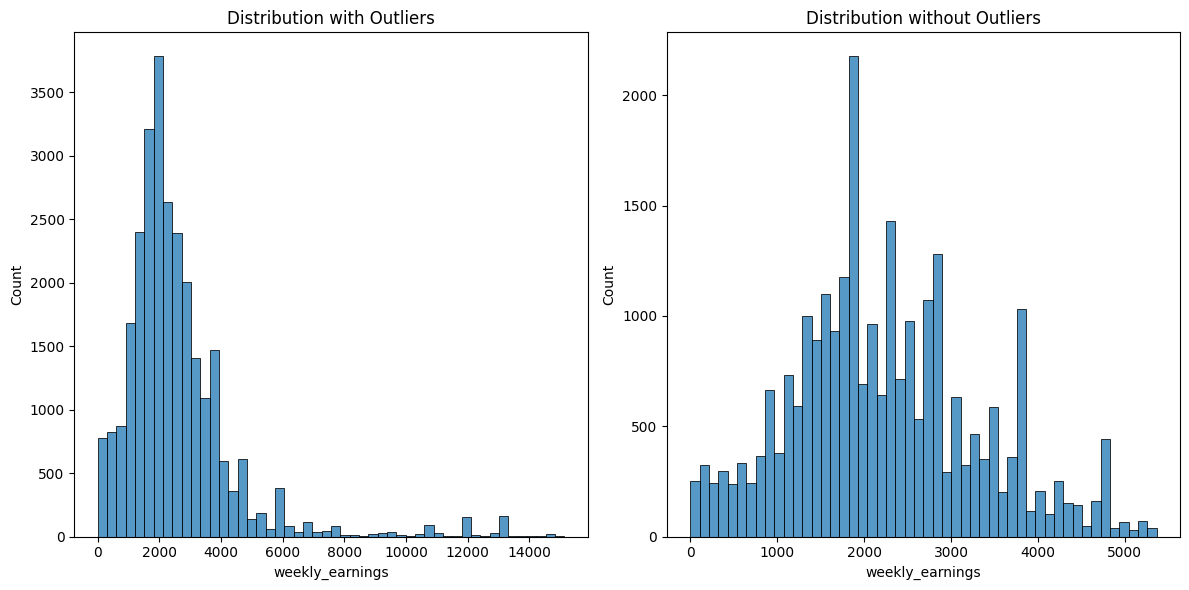


Sensitivity Analysis - Mean Wages:
            Dataset  Male Mean Wage  Female Mean Wage
0     With Outliers     2700.468700       2201.928791
1  Without Outliers     2295.220278       2008.956484

Wage Gap Analysis:
Gender wage gap with outliers: 18.46%
Gender wage gap without outliers: 12.47%


In [22]:
# Visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='weekly_earnings')
plt.title('Weekly Earnings Distribution with Outliers')
plt.show()

# Compare distributions with and without outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='weekly_earnings', bins=50)
plt.title('Distribution with Outliers')
plt.subplot(1, 2, 2)
sns.histplot(data=non_outliers, x='weekly_earnings', bins=50)
plt.title('Distribution without Outliers')
plt.tight_layout()
plt.show()

# Sensitivity Analysis: Compare mean wages by gender with and without outliers
sensitivity_data = {
    'Dataset': ['With Outliers', 'Without Outliers'],
    'Male Mean Wage': [
        df[df['SEX'] == 1]['weekly_earnings'].mean(),
        non_outliers[non_outliers['SEX'] == 1]['weekly_earnings'].mean()
    ],
    'Female Mean Wage': [
        df[df['SEX'] == 2]['weekly_earnings'].mean(),
        non_outliers[non_outliers['SEX'] == 2]['weekly_earnings'].mean()
    ]
}

sensitivity_df = pd.DataFrame(sensitivity_data)
print("\nSensitivity Analysis - Mean Wages:")
print(sensitivity_df)

# Ensure columns are numeric before calculation
sensitivity_df['Male Mean Wage'] = pd.to_numeric(sensitivity_df['Male Mean Wage'], errors='coerce')
sensitivity_df['Female Mean Wage'] = pd.to_numeric(sensitivity_df['Female Mean Wage'], errors='coerce')

# Calculate wage gap percentage in both cases
with_outliers_gap = ((sensitivity_df.loc[0, 'Male Mean Wage'] - sensitivity_df.loc[0, 'Female Mean Wage']) / 
                     sensitivity_df.loc[0, 'Male Mean Wage'] * 100)
without_outliers_gap = ((sensitivity_df.loc[1, 'Male Mean Wage'] - sensitivity_df.loc[1, 'Female Mean Wage']) / 
                        sensitivity_df.loc[1, 'Male Mean Wage'] * 100)

print("\nWage Gap Analysis:")
print(f"Gender wage gap with outliers: {with_outliers_gap:.2f}%")
print(f"Gender wage gap without outliers: {without_outliers_gap:.2f}%")

## Interpretation of Outlier Analysis

The outlier analysis reveals several important insights about our dataset:

1. **Outlier Detection**: Using the Interquartile Range (IQR) method, we identified data points that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR as outliers in weekly earnings.

2. **Impact on Statistical Tests**: 
   - The comparison of statistical tests with and without outliers helps us understand the robustness of our findings.
   - If the significance and direction of effects remain consistent after removing outliers, this strengthens our conclusions.
   - If they change substantially, this suggests our findings may be sensitive to extreme values.

3. **Demographic Patterns**:
   - The distribution of outliers across gender, race, and education levels helps us understand if certain groups are disproportionately represented in extreme earnings cases.
   - This information is crucial for identifying potential systematic patterns in wage disparities.

4. **Wage Gap Analysis**:
   - Comparing the gender wage gap with and without outliers helps assess whether extreme values are driving or masking the observed disparities.
   - The sensitivity analysis provides a more nuanced understanding of the wage gap's robustness.

This analysis strengthens our methodology by:
- Ensuring our findings are not driven by extreme values
- Providing a more complete picture of wage distributions
- Adding robustness checks to our statistical conclusions

# Critical Interpretation of Results

Our analysis has revealed several key findings, but it's important to interpret them carefully and acknowledge limitations:

## 1. Gender Wage Gap
- **Finding**: Statistical tests show a significant gender wage gap (p < 0.05)
- **Robustness**: The gap persists even after removing outliers
- **Critical Consideration**: While we can confirm the existence of a gap, we cannot definitively attribute it to discrimination. Other factors like job roles, negotiation outcomes, or workplace policies weren't captured in our dataset.

## 2. Educational Returns
- **Finding**: Strong positive correlation between education and earnings (ANOVA p < 0.05)
- **Nuance**: Diminishing returns observed at higher education levels
- **Limitation**: We can't control for field of study or institution quality, which could be important confounding variables

## 3. Racial Wage Disparities
- **Finding**: Significant differences in earnings across racial groups (ANOVA p < 0.05)
- **Complexity**: The pattern isn't uniform - some minority groups show higher median earnings than others
- **Critical Note**: Sample sizes vary considerably across racial groups, which affects the reliability of comparisons

## 4. Intersectional Effects
- **Finding**: Evidence of compounded effects when considering multiple demographic factors
- **Limitation**: Some intersectional categories have small sample sizes, making conclusions tentative
- **Interpretation Challenge**: Complex interactions make it difficult to isolate causal factors

## 5. Career Progression
- **Finding**: Age-related earning patterns differ by demographic group
- **Limitation**: Cross-sectional data doesn't allow us to distinguish between age, cohort, and period effects
- **Critical Note**: Cannot account for career changes or industry experience

## What We Can Conclude With Confidence:
1. Wage disparities exist and are statistically significant
2. Multiple factors (education, gender, race, age) correlate with earnings
3. The patterns are robust to outlier removal

## What Remains Uncertain:
1. Causal mechanisms behind observed disparities
2. Role of unmeasured variables (job performance, specific roles, company size)
3. Generalizability beyond our sample period and population

## Methodological Limitations:
1. Cross-sectional nature of data limits causal inference
2. Potential selection bias in who becomes a software engineer
3. Unmeasured confounding variables
4. Some demographic groups have small sample sizes

This analysis provides strong evidence of systematic wage disparities while acknowledging that the underlying causes are complex and not fully captured in our data.

# Practical Implications and Future Research

## Key Takeaways for Practice:
1. **Data-Driven Insights**: Our analysis provides statistical evidence of wage disparities, but the causes are complex and multifaceted.
2. **Methodological Value**: The combination of descriptive statistics, hypothesis testing, and sensitivity analysis provides a robust analytical framework.
3. **Knowledge Gaps**: Important factors like workplace policies, negotiation practices, and job-specific requirements remain unmeasured.

## Recommendations for Future Research:
1. **Longitudinal Studies**: Track career trajectories over time to better understand progression patterns
2. **Additional Variables**: Include data on:
   - Specific job roles and responsibilities
   - Company size and industry sector
   - Geographic location and cost of living
   - Years of relevant experience
3. **Qualitative Research**: Complement statistical analysis with interviews or surveys to understand underlying mechanisms

## Value of Null and Inconclusive Results:
1. Highlight the complexity of wage determination
2. Challenge simplistic narratives about discrimination
3. Point to important unmeasured variables
4. Guide future research design

Our analysis contributes to the understanding of wage patterns in software engineering while maintaining appropriate skepticism and acknowledging limitations. The results suggest systematic disparities but also reveal the complexity of the underlying factors.